# Дерево решений
- система  дерева направлена на снижение Энтропии (меры хаоса в системе) и выделение класса по каким-то значениям признаков

- Слабость дерева в том, что они неспособны к высокой точности из-за большой дисперсии

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

x_train shape: (112, 2), y_train shape:(112,),
 x_test shape:(38, 2), y_test shape:, (38,)


,0,1,2
0,4.2,1.5,1.0
1,4.0,1.2,1.0
2,5.5,2.1,2.0
3,1.3,0.2,0.0
4,5.1,2.3,2.0


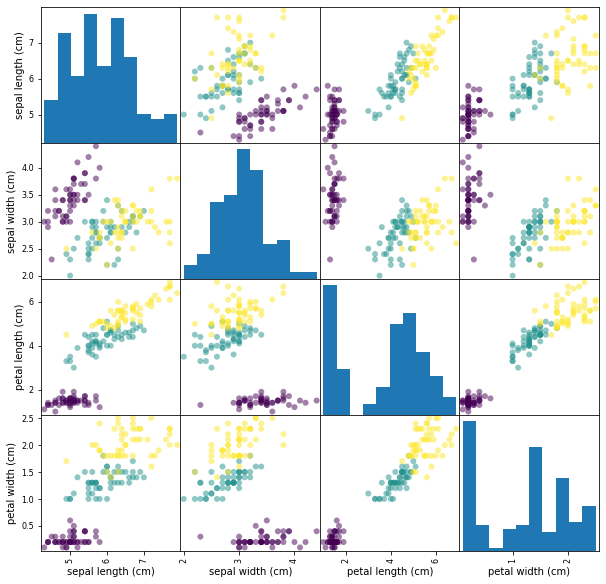

In [29]:
iris_dataset = load_iris()
iris_dataset.keys()

iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_df, c=iris_dataset.target, figsize=(10, 10), marker='o')

x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset.data[:, 2:4],        #если брать все фичи, то процент точности вырастет
    iris_dataset.target,
    random_state=0
    )

print(f'x_train shape: {x_train.shape}, y_train shape:{y_train.shape},\n',
    f'x_test shape:{x_test.shape}, y_test shape:, {y_test.shape}')
    #Чтобы было все окей - одинаковое кол-во строк в каждой группе - по цп 1 столбец, по фичам - сколь угодно

x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)

pd.DataFrame(x_train_concat).head(5)

Построим модель с критерием качества по умолчанию - gini

In [44]:

dtc = DecisionTreeClassifier(random_state=42, max_features=2)
dtc_model = dtc.fit(x_train, y_train)

dtc_pred = dtc_model.predict(x_test)
# accuracy_score(y_test, dtc_pred)
#or
dtc.score(x_test, y_test)

0.9473684210526315

[Text(465.0, 996.6, 'X[0] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(372.0, 815.4000000000001, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(558.0, 815.4000000000001, 'X[0] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(186.0, 634.2, 'X[1] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(93.0, 453.0, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(279.0, 453.0, 'X[0] <= 4.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(186.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(372.0, 271.79999999999995, 'X[0] <= 4.85\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(279.0, 90.59999999999991, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(465.0, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(930.0, 634.2, 'X[0] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(837.0, 453.0, 'X[1] <= 1.8\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'

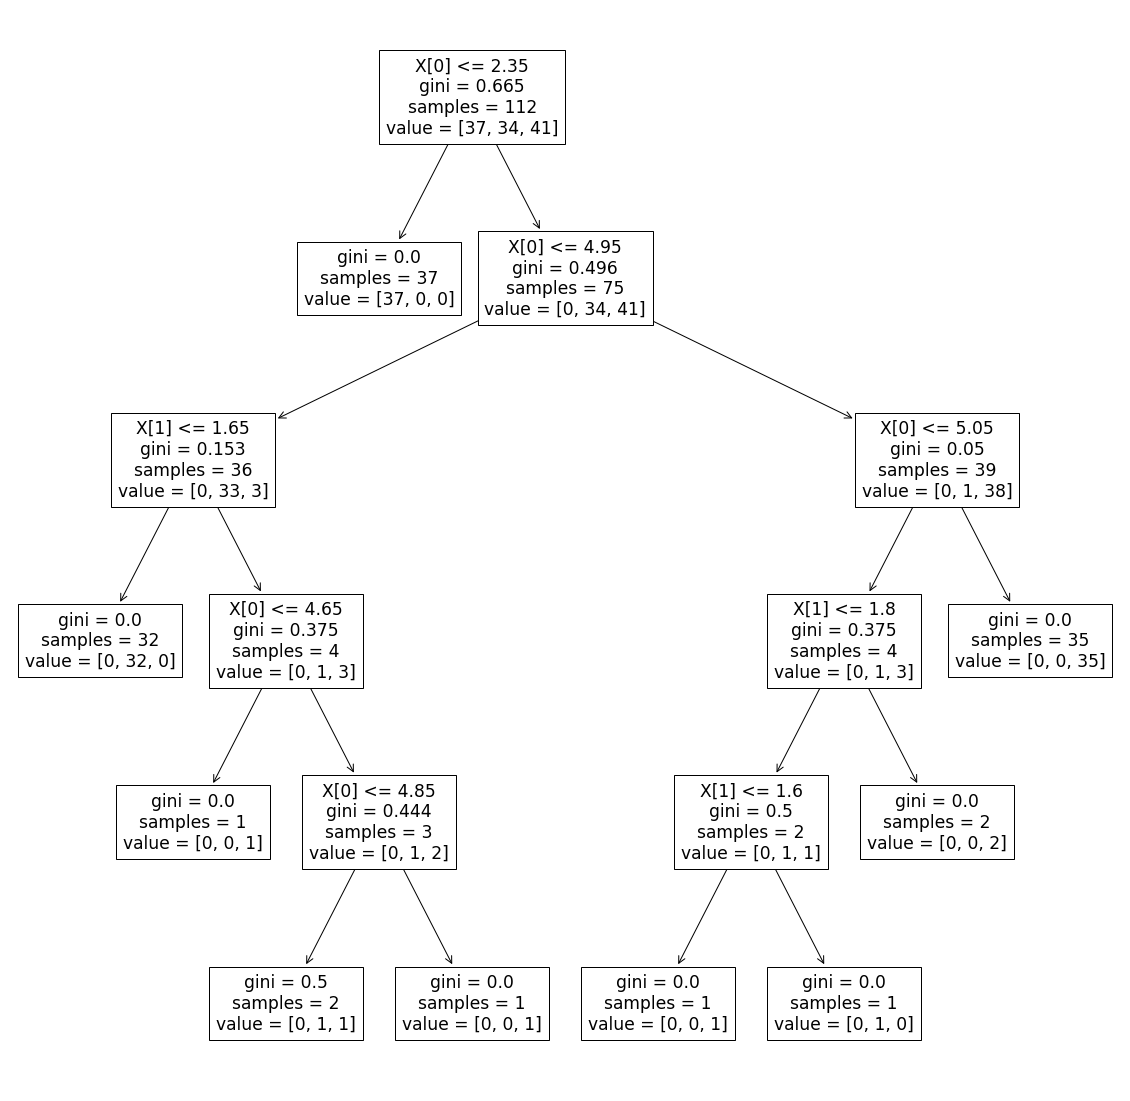

In [31]:
plt.figure(figsize=(20, 20))
tree.plot_tree(dtc_model)

Построим модель с критерием качества - Энтропия

In [40]:
dtc_entrp = DecisionTreeClassifier(criterion='entropy')
dtc_model_entrp = dtc_entrp.fit(x_train, y_train)
dtc_pred_entrp = dtc_model_entrp.predict(x_test)
print('Accuracy %.5f' % dtc.score(x_test, y_test))

Accuracy 0.94737


In [32]:
# #тут должна была быть визуализация дерева
# def print_graph(data):
#     dot_data = tree.export_graphviz(data, out_file=None,
#                                     feature_names=iris_dataset.feature_names[2:4],
#                                     class_names=iris_dataset.target_names,
#                                     filled=True)
#     return graphviz.Source(dot_data)

# print_graph(dtc_model)

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {
    'max_depth':range(1,6),
    'max_features':range(1, 10)
}

tree_grid = GridSearchCV(tree, tree_params, cv=5)   #настройка гиперпараметров на 5 кратной валидации
tree_grid.fit(iris_dataset.data, iris_dataset.target)

#...

TypeError: __init__() missing 1 required positional argument: 'param_grid'